Homework Tasks: 
 
Choose a real-world dataset and perform  a regression task using both simple 
linear regression and decision tree regression. Compare the model performance. 
Choose  a  different  real-world  dataset  and  perform  a  classification  task  using 
both Naive Bayes and decision tree classification. Compare the model 
accuracy. 
Write a brief report summarizing your findings, including the dataset used, data 
preprocessing steps, model implementation, evaluation metrics, and a 
discussion of the results.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
# Load the data local petrol_consumption.csv

data = pd.read_csv('petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
data.shape

(48, 5)

In [6]:
data.isna().sum()   

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [7]:
predictor_var= data[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']] #all columns except the last one
target_var= data['Petrol_Consumption'] #only the last column

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, Y_train, Y_test = train_test_split(predictor_var,target_var, test_size=0.30, random_state=123)


In [9]:
tree = DecisionTreeRegressor()


In [10]:
tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)


In [11]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('r2_score:', metrics.r2_score(Y_test,predictions))

Mean Absolute Error: 101.93333333333334
Mean Squared Error: 17699.533333333333
Root Mean Squared Error: 133.0395931042084
r2_score: 0.23424375322558677


In [12]:
y_pred = tree.predict(X_test)

In [13]:
r2 = r2_score(Y_test, y_pred) 
mse=mean_squared_error(Y_test, y_pred)
print('R2 score: ', r2)
print('Mean Squared Error: ', mse)
 
 
 


R2 score:  0.23424375322558677
Mean Squared Error:  17699.533333333333


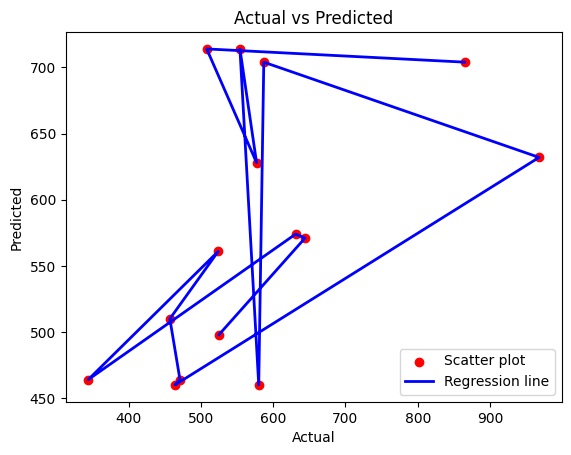

In [14]:
plt.Figure(figsize=(10,5))
plt.scatter(Y_test, y_pred, color='red',label='Scatter plot')
plt.plot(Y_test, y_pred, color='blue', linewidth=2,label='Regression line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [15]:
#linear regression 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()


In [16]:
linear.fit(X_train, Y_train)
predictions = linear.predict(X_test)


In [17]:
r2 = r2_score(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
print('R2 score: ', r2)
print('Mean Squared Error: ', mse)

R2 score:  0.6479871706715327
Mean Squared Error:  8136.352570030864


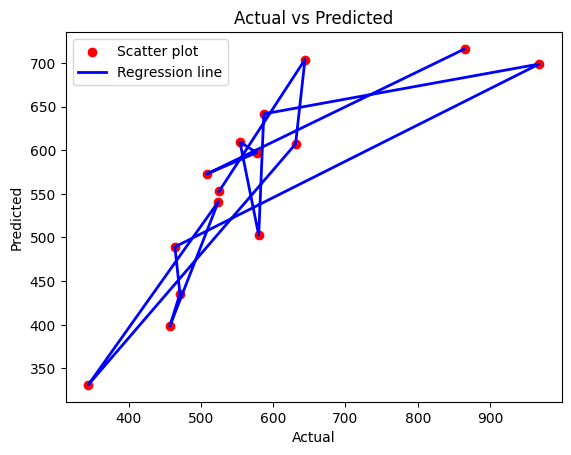

In [18]:
plt.Figure(figsize=(10,5))
plt.scatter(Y_test, predictions, color='red',label='Scatter plot')
plt.plot(Y_test, predictions, color='blue', linewidth=2,label='Regression line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [19]:
#comparing the two models the liner regression model is better than the decision 
# tree model as it has a higher r2 score and
#  lower mean squared error amd root mean squared error 
# the linear regression model is a better fit for the data


*** classfication problem *** 

In [20]:
cdata = pd.read_csv('email_classification.csv')
cdata.head()



,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


In [21]:
#Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# encoding 
cdata['label'] = cdata['label'].map({'ham': 1, 'spam': 0})
cdata.head()



,email,label
0,Upgrade to our premium plan for exclusive acce...,1
1,Happy holidays from our team! Wishing you joy ...,1
2,We're hiring! Check out our career opportuniti...,1
3,Your Amazon account has been locked. Click her...,0
4,Your opinion matters! Take our survey and help...,1


In [22]:
cdata.isna().sum()

email    0
label    0
dtype: int64

In [23]:
cdata.shape

(179, 2)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
predictor_var = cdata.iloc[:, 1:57]  
target_var = cdata['label']   

In [26]:

X_train, X_test, Y_train, Y_test = train_test_split(predictor_var, target_var, test_size=0.30, random_state=123)


In [27]:

gnb = GaussianNB()
gnb.fit(X_train, Y_train)


GaussianNB()

In [28]:
predictions = gnb.predict(X_test)


In [29]:

# Classification metrics
print('Accuracy:', metrics.accuracy_score(Y_test, predictions))
print('Precision:', metrics.precision_score(Y_test, predictions, average='weighted'))
print('Recall:', metrics.recall_score(Y_test, predictions, average='weighted'))
print('F1 Score:', metrics.f1_score(Y_test, predictions, average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


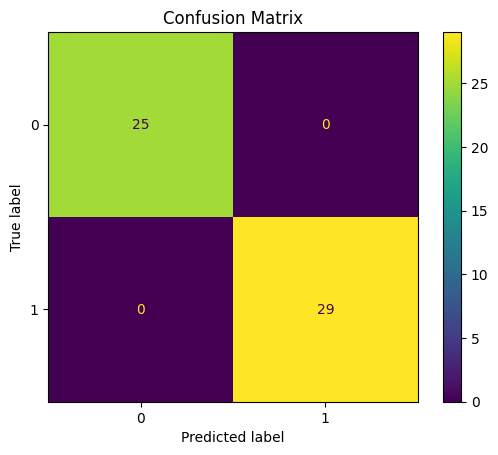

In [30]:

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(gnb, X_test, Y_test)
plt.title("Confusion Matrix")
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


In [32]:

# Define predictor and target variables
predictor_var = cdata.iloc[:, 1:57]  # All columns except the last one
target_var = cdata['label']          # Only the last column


In [33]:

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(predictor_var, target_var, test_size=0.50, random_state=123)


In [34]:

# Model
dtc = DecisionTreeClassifier(random_state=123)
dtc.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=123)

In [35]:

# Predictions
predictions = dtc.predict(X_test)


In [36]:

# Classification metrics
print('Accuracy:', metrics.accuracy_score(Y_test, predictions))
print('Precision:', metrics.precision_score(Y_test, predictions, average='weighted'))
print('Recall:', metrics.recall_score(Y_test, predictions, average='weighted'))
print('F1 Score:', metrics.f1_score(Y_test, predictions, average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [44]:
# Display the head of the predicted values and the actual values
predicted_vs_actual = pd.DataFrame({'Actual': Y_test.head(), 'Predicted': predictions[:5]})
predicted_vs_actual

,Actual,Predicted
139,0,0
60,0,0
132,0,0
77,1,1
100,0,0


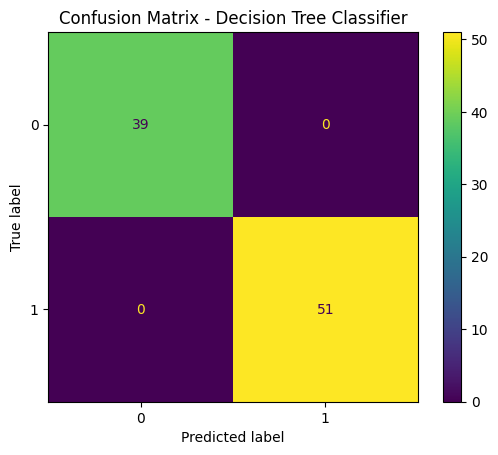

In [37]:

ConfusionMatrixDisplay.from_estimator(dtc, X_test, Y_test)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


In [38]:
from sklearn.model_selection import cross_val_score

# For Naive Bayes
gnb_scores = cross_val_score(GaussianNB(), predictor_var, target_var, cv=5, scoring='accuracy')
print("Naive Bayes Cross-Validation Accuracy:", gnb_scores.mean())

# For Decision Tree
dtc_scores = cross_val_score(DecisionTreeClassifier(random_state=123), predictor_var, target_var, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy:", dtc_scores.mean())


Naive Bayes Cross-Validation Accuracy: 1.0
Decision Tree Cross-Validation Accuracy: 1.0


In [39]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=123)
dtc.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=123)

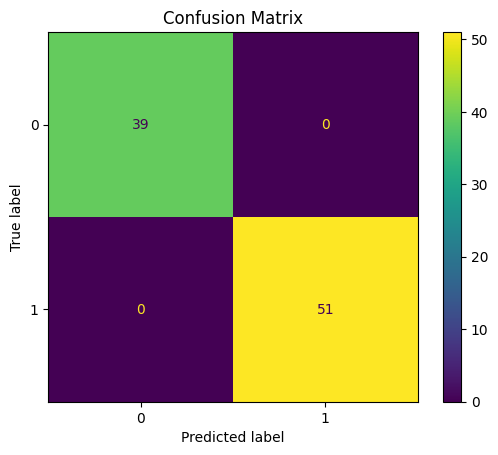

In [40]:
ConfusionMatrixDisplay.from_estimator(dtc, X_test, Y_test)
plt.title("Confusion Matrix")
plt.show()


In [43]:
# Display the head of the predicted values and the actual values
predicted_vs_actual = pd.DataFrame({'Actual': Y_test.head(), 'Predicted': predictions[:5]})
predicted_vs_actual

,Actual,Predicted
139,0,0
60,0,0
132,0,0
77,1,1
100,0,0


In [ ]:
#both of the models has achieved same result in terms of 
#Accuracy: 1.0
#Precision: 1.0
#Recall: 1.0
#F1 Score: 1.0
#there for have ran cross validation to check the accuracy of the models
#Naive Bayes Cross-Validation Accuracy: 1.0
#Decision Tree Cross-Validation Accuracy: 1.0
#the models are both accurate and have a high accuracy rate
#can use ether of the models to predict the email classification
